In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [5]:
olibank_1=pd.read_csv('../data/2019년 상반기 주유소 판매가격.csv',encoding="cp949")
olibank_2=pd.read_csv('../data/2019년 하반기 주유소 판매가격.csv',encoding="cp949")

In [6]:
# 상반기 판매가격 데이터 프레임 결측치 조회

olibank_1.isnull().sum()

번호       0
지역       0
상호       0
주소       0
기간       0
상표       0
셀프여부     0
고급휘발유    0
휘발유      0
경유       0
실내등유     0
dtype: int64

In [7]:
# 하반기 판매가격 데이터 프레임 결측치 조회

olibank_2.isnull().sum()

번호       0
지역       0
상호       0
주소       0
기간       0
상표       0
셀프여부     0
고급휘발유    0
휘발유      0
경유       0
실내등유     0
dtype: int64

# 2. 데이터 결합

In [8]:
# 상반기와 하반기 데이터를 상하로 결합

olibank=pd.concat([olibank_1,olibank_2])
olibank

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0
...,...,...,...,...,...,...,...,...,...,...,...
91119,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100
91120,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100
91121,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100
91122,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100


# 3. 데이터 가공 및 분석


In [9]:
# 데이터 프레임 정보 조회

olibank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181714 entries, 0 to 91123
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      181714 non-null  object
 1   지역      181714 non-null  object
 2   상호      181714 non-null  object
 3   주소      181714 non-null  object
 4   기간      181714 non-null  int64 
 5   상표      181714 non-null  object
 6   셀프여부    181714 non-null  object
 7   고급휘발유   181714 non-null  int64 
 8   휘발유     181714 non-null  int64 
 9   경유      181714 non-null  int64 
 10  실내등유    181714 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 16.6+ MB


In [10]:
# 상표 컬럼의 고유값 조회

olibank['상표'].unique()

array(['SK에너지', 'GS칼텍스', 'S-OIL', '현대오일뱅크', '알뜰주유소', 'NH-OIL', '알뜰(ex)',
       '자가상표'], dtype=object)

In [11]:
# 지역 컬럼의 고유값 조회

olibank['지역'].unique()

array(['서울 강남구', '서울 강동구', '서울 강북구', '서울 강서구', '서울 관악구', '서울 광진구',
       '서울 구로구', '서울 금천구', '서울 노원구', '서울 도봉구', '서울 동대문구', '서울 동작구',
       '서울 마포구', '서울 서대문구', '서울 서초구', '서울 성동구', '서울 성북구', '서울 송파구',
       '서울 양천구', '서울 영등포구', '서울 용산구', '서울 은평구', '서울 종로구', '서울 중구',
       '서울 중랑구'], dtype=object)

In [12]:
# 지역 컬럼의 값을 이용하여 시와 구를 분리

olibank['시']=olibank.지역.str.split(' ').str[0]
olibank['구']=olibank.지역.str.split(' ').str[1]
olibank

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0,서울,강남구
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0,서울,강남구
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0,서울,강남구
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0,서울,강남구
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0,서울,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91119,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100,서울,중랑구
91120,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100,서울,중랑구
91121,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100,서울,중랑구
91122,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100,서울,중랑구


In [13]:
# 시 컬럼의 서울을 서울특별시로 변환

olibank.loc[olibank['시']=="서울","시"]="서울특별시"

olibank

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91119,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구
91120,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구
91121,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구
91122,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구


In [14]:
# 기간 컬럼에서 dt 타입을 이용하여 년, 월, 일, 요일 컬럼 생성

olibank['기간']= pd.to_datetime(olibank['기간'])

olibank['년']=olibank['기간'].dt.year
olibank['월']=olibank['기간'].dt.month
olibank['일']=olibank['기간'].dt.day
olibank['요일']=olibank['기간'].dt.day_name()

olibank


,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,1970-01-01 00:00:00.020190101,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,1970,1,1,Thursday
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,1970-01-01 00:00:00.020190102,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,1970,1,1,Thursday
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,1970-01-01 00:00:00.020190103,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,1970,1,1,Thursday
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,1970-01-01 00:00:00.020190104,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,1970,1,1,Thursday
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,1970-01-01 00:00:00.020190105,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,1970,1,1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91119,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,1970-01-01 00:00:00.020191227,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구,1970,1,1,Thursday
91120,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,1970-01-01 00:00:00.020191228,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구,1970,1,1,Thursday
91121,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,1970-01-01 00:00:00.020191229,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구,1970,1,1,Thursday
91122,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,1970-01-01 00:00:00.020191230,GS칼텍스,셀프,0,1540,1389,1100,서울특별시,중랑구,1970,1,1,Thursday


In [15]:
# 휘발유 가격이 비싼 5개 판매가격을 출력하세요.

olibank.sort_values('휘발유',ascending=False).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
86620,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,1970-01-01 00:00:00.020190924,SK에너지,일반,2649,2356,2196,0,서울특별시,중구,1970,1,1,Thursday
86626,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,1970-01-01 00:00:00.020190930,SK에너지,일반,2699,2356,2196,0,서울특별시,중구,1970,1,1,Thursday
86627,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,1970-01-01 00:00:00.020191001,SK에너지,일반,2699,2356,2196,0,서울특별시,중구,1970,1,1,Thursday
86621,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,1970-01-01 00:00:00.020190925,SK에너지,일반,2649,2356,2196,0,서울특별시,중구,1970,1,1,Thursday
86622,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,1970-01-01 00:00:00.020190926,SK에너지,일반,2699,2356,2196,0,서울특별시,중구,1970,1,1,Thursday


In [16]:
# 휘발유 가격이 저렴한 5개 판매가격을 출력하세요. (단 휘발유가 0원인 데이터는 제외)

olibank[olibank['휘발유']>0].sort_values('휘발유').head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
13148,A0033328,서울 강서구,KH에너지(주)직영 KH외발산주유소,서울 강서구 방화대로 30,1970-01-01 00:00:00.020190207,SK에너지,셀프,1788,1255,1155,0,서울특별시,강서구,1970,1,1,Thursday
82475,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),1970-01-01 00:00:00.020190131,SK에너지,일반,0,1260,1160,0,서울특별시,은평구,1970,1,1,Thursday
82474,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),1970-01-01 00:00:00.020190130,SK에너지,일반,0,1260,1160,0,서울특별시,은평구,1970,1,1,Thursday
82476,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),1970-01-01 00:00:00.020190201,SK에너지,일반,0,1260,1160,0,서울특별시,은평구,1970,1,1,Thursday
82998,A0000690,서울 은평구,지에스칼텍스(주)수색뉴타운주유소,서울 은평구 수색로 350 (수색동),1970-01-01 00:00:00.020190126,GS칼텍스,셀프,0,1265,1165,0,서울특별시,은평구,1970,1,1,Thursday


In [17]:
# 상표별 평균 휘발유 가격을 계산하세요.

olibank.pivot_table('휘발유','상표',aggfunc='mean')

,휘발유
상표,
GS칼텍스,1564.029014
NH-OIL,1449.088889
S-OIL,1532.302882
SK에너지,1612.147153
알뜰(ex),1431.347945
알뜰주유소,1447.875902
자가상표,1492.085540
현대오일뱅크,1515.458244


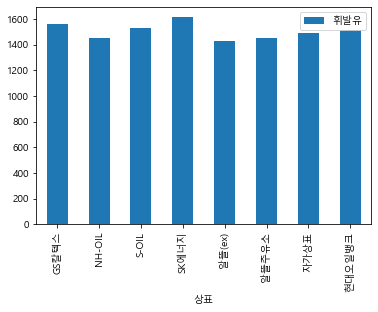

In [18]:
# 상표별 평균 휘발유 가격을 시각화하세요.

olibank.pivot_table('휘발유','상표',aggfunc='mean').plot(kind='bar')
plt.show()

In [19]:
# 상표와 셀프여부별 평균 휘발유 가격을 계산하세요.

olibank.pivot_table('휘발유',['상표','셀프여부'],aggfunc='mean')

휘발유
상표     셀프여부             
GS칼텍스  셀프    1481.410074
       일반    1610.060123
NH-OIL 일반    1449.088889
S-OIL  셀프    1481.437428
       일반    1579.451162
SK에너지  셀프    1504.853863
       일반    1690.377765
알뜰(ex) 셀프    1431.347945
알뜰주유소  셀프    1434.726027
       일반    1455.372511
자가상표   셀프    1494.409449
       일반    1491.740351
현대오일뱅크 셀프    1483.546767
       일반    1534.254225

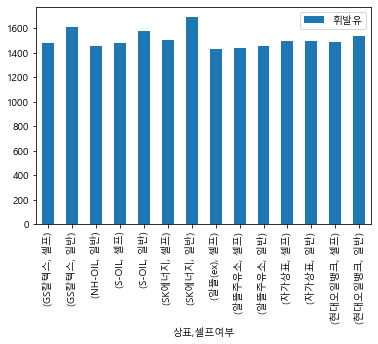

In [20]:
# 상표와 셀프여부별 평균 휘발유 가격을 시각화하세요.

olibank.pivot_table('휘발유',['상표','셀프여부'],aggfunc='mean').plot(kind='bar')
plt.show()

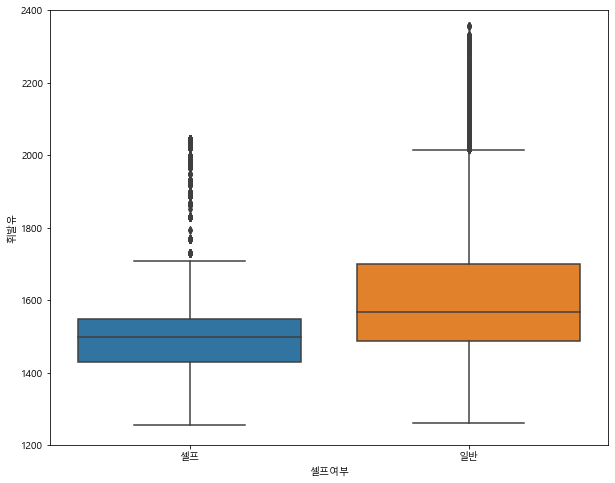

In [21]:
# 셀프여부에 따라 휘발유 가격을 boxplot으로 시각화해보세요.
# 휘발유가 0인 데이터는 제외하고 시각화합니다.
plt.figure(figsize=(10,8))

sns.boxplot(x='셀프여부',y='휘발유',data=olibank)
plt.ylim(1200, 2400)
plt.show()

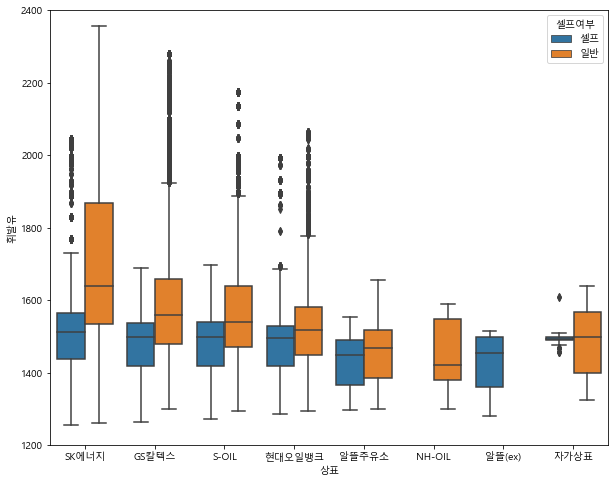

In [22]:
# 휘발유 가격과 일반 주유소의 가격을 boxplot을 이용하여 시각화해보세요.
# 휘발유가 0인 데이터는 제외하고 시각화합니다.
plt.figure(figsize=(10,8))

sns.boxplot(x='상표',y='휘발유',hue='셀프여부',data=olibank)
plt.ylim(1200, 2400)
plt.show()

In [23]:
# 지역별 평균 휘발유 가격을 계산하세요

olibank.pivot_table('휘발유','구',aggfunc='mean')

,휘발유
구,
강남구,1713.093581
강동구,1576.685264
강북구,1453.517525
강서구,1488.818088
관악구,1518.128564
광진구,1490.597054
구로구,1525.410383
금천구,1477.121992
노원구,1531.221551


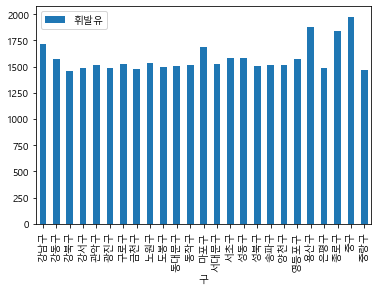

In [24]:
# 지역별 평균 휘발유 가격을 시각화하세요.
olibank.pivot_table('휘발유','구',aggfunc='mean').plot(kind='bar')
plt.show()

In [25]:
# 월별 평균 휘발유 가격을 계산하세요

olibank.pivot_table('휘발유','월',aggfunc='mean')

,휘발유
월,
1,1567.148161


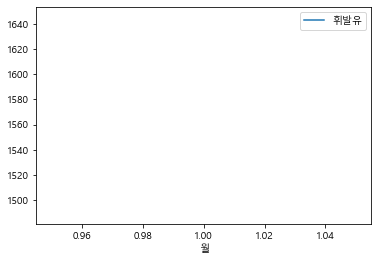

In [33]:
# 월별 평균 휘발유 가격을 계산하세요
olibank.pivot_table('휘발유','월',aggfunc='mean').plot(kind='line')
plt.show()

In [27]:
# pivot_table 함수를 이용하여 구와 월 컬럼을 이용하여 평균 휘발유 가격을 계산하세요

olibank.pivot_table(index='월',columns='구',values='휘발유',aggfunc='mean')

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
월,,,,,,,,,,,,,,,,,,,,,
1,1713.093581,1576.685264,1453.517525,1488.818088,1518.128564,1490.597054,1525.410383,1477.121992,1531.221551,1494.171062,...,1583.659561,1507.948267,1518.957954,1512.890261,1568.279506,1882.049825,1481.964026,1838.554945,1976.948052,1469.009092


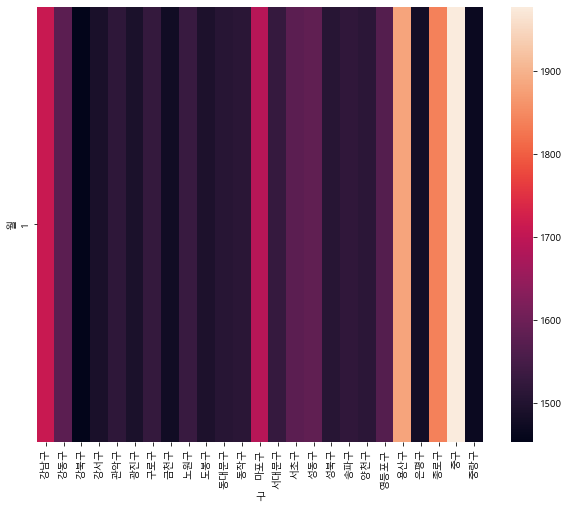

In [28]:
# pivot_table 함수를 이용하여 구와 월 컬럼을 이용하여 평균 휘발유 가격을 시각화 하세요 (heatmap 이용)

plt.figure(figsize=(10,8))

temp=olibank.pivot_table(index='월',columns='구',values='휘발유',aggfunc='mean')

sns.heatmap(temp)
plt.show()

# 시각화

In [29]:
# 고급휘발유를 함께 판매하는 곳의 휘발유 가격과 고급휘발유를 판매하지 않는 곳의 휘발유 가격 비교

In [30]:
#  중동지역 안정도와 국내 정유사 기름가격
# 달러환율에 따른 

In [51]:
olibank[(olibank['상표']=='알뜰주유소')|(olibank['상표']=='알뜰(ex)')].pivot_table('휘발유','상표',aggfunc='mean')

,휘발유
상표,
알뜰(ex),1431.347945
알뜰주유소,1447.875902


In [58]:
olibank[(olibank['상표']!='알뜰주유소')&(olibank['상표']!='알뜰(ex)')].pivot_table('휘발유','상표',aggfunc='mean',margin=)

,휘발유
상표,
GS칼텍스,1564.029014
NH-OIL,1449.088889
S-OIL,1532.302882
SK에너지,1612.147153
자가상표,1492.085540
현대오일뱅크,1515.458244
